### 8.a. Generate simulated dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(1)

In [3]:
x = np.random.normal(size=100)

In [4]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

In [5]:
len(x)

100

In [6]:
x.mean(), np.sqrt(x.var()) # so roughly standard normal

(0.060582852075698704, 0.885156213831585)

In [7]:
y = x - 2 * np.power(x, 2) + np.random.normal(size=100)

In [8]:
y

array([-4.09977892e+00, -1.35740528e-01, -6.82610910e-01, -2.78191343e+00,
       -1.72736495e+00, -1.27263170e+01, -3.60336797e+00, -2.87377939e+00,
       -1.50751300e-01, -3.41126997e-01, -4.18652862e+00, -1.02333408e+01,
        3.15837737e-01, -1.53856579e+00, -1.08655088e+00, -4.83169628e+00,
       -2.70586690e-01, -4.03490158e+00,  1.16006745e+00,  3.12368605e-01,
       -3.54796128e+00, -2.25122265e+00,  5.49614996e-01,  1.96459497e+00,
       -2.58020880e+00, -3.82531400e-01,  1.47455651e+00, -2.34908661e+00,
       -1.61068416e+00,  8.31146942e-01, -1.82937024e+00, -1.31550088e+00,
       -2.86164348e+00, -1.72341330e+00, -7.79582001e-01, -6.36516113e-01,
       -3.09349884e+00, -1.01982713e+00, -3.04822333e+00, -3.12647613e-01,
       -4.52007083e-01, -2.56514519e+00, -9.94763169e-01, -3.28593891e+00,
        5.75110223e-01, -1.31082134e+00,  1.95839168e-01, -6.10350788e+00,
        3.23777164e-01,  5.37875159e-01, -1.90150896e-01, -3.03524752e+00,
       -2.71438926e+00,  

In [9]:
len(y)

100

**n = 100**
<br>
**p = 2**
<br>
**y = X - 2X$^{2}$ + $\epsilon$**

### 8.b. Scatterplot of X against Y

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'y')

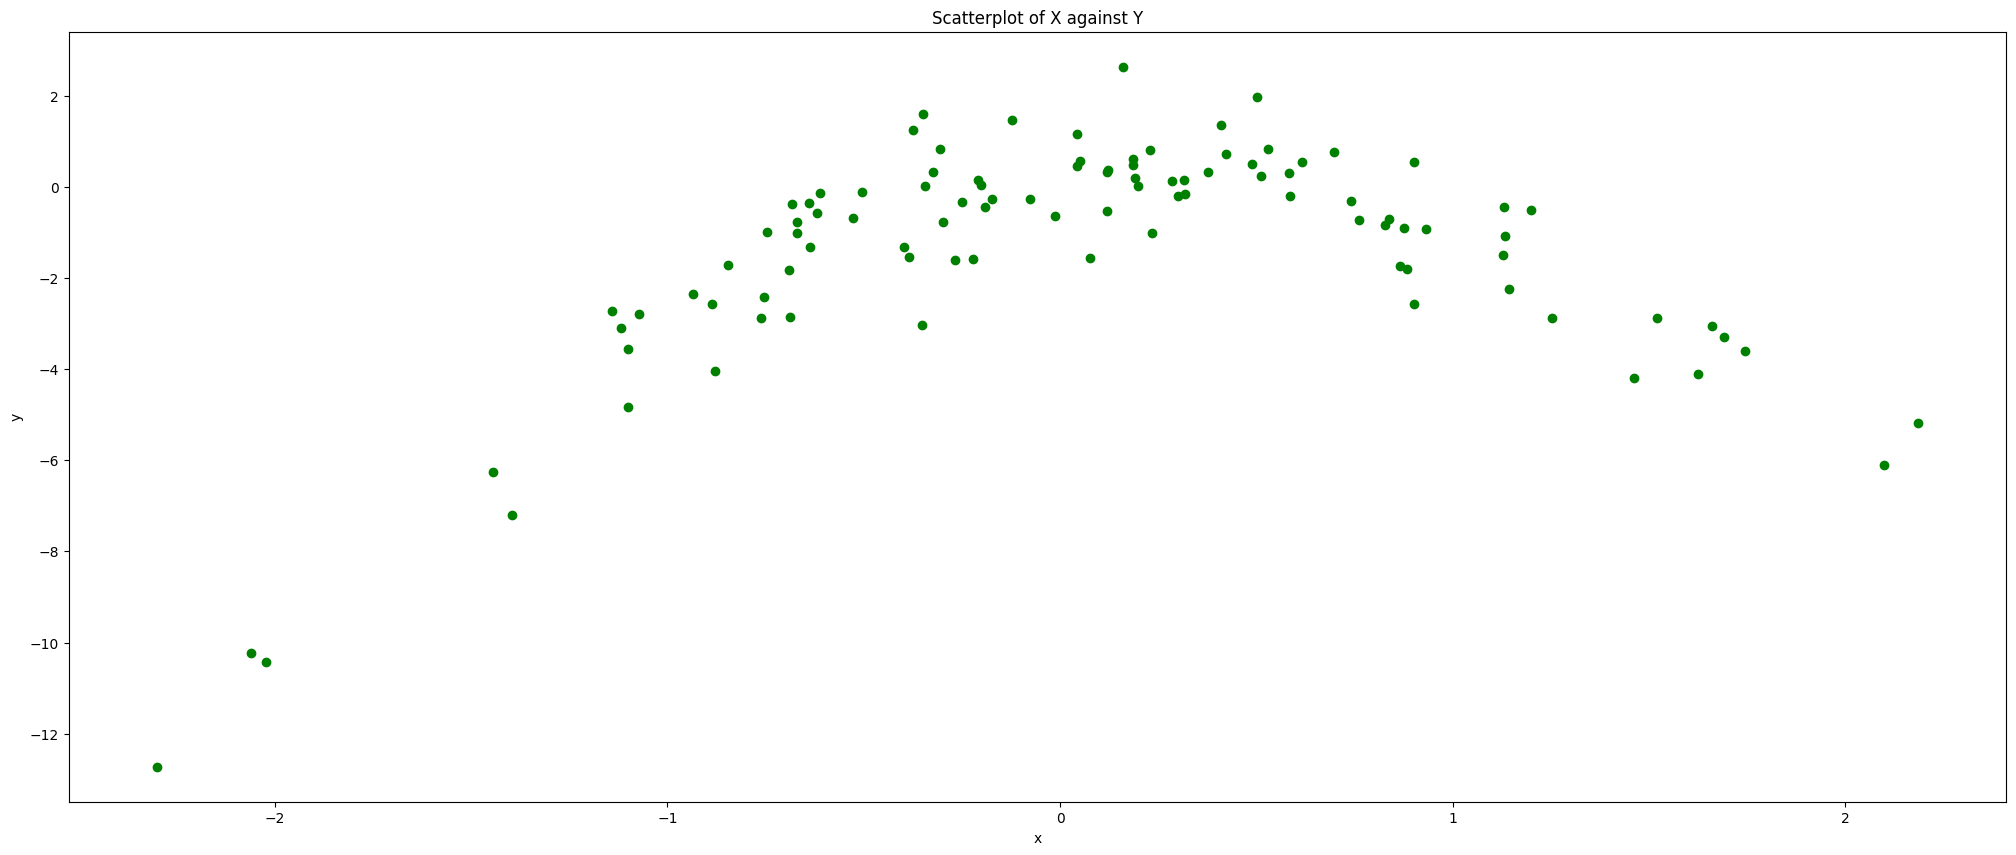

In [11]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
plt.scatter(x, y, color = 'green')
plt.title("Scatterplot of X against Y")
plt.xlabel("x")
plt.ylabel("y")

### 8.c. Computing LOOCV errors for four different models using least squares (random_seed = 1)

In [12]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [13]:
from sklearn.model_selection import LeaveOneOut, train_test_split

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [16]:
np.random.seed(1)

In [17]:
x = x.reshape(-1,1)

In [18]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)

In [19]:
X.columns = ['X']
Y.columns = ['Y']

In [20]:
X.head()

,X
0,1.624345
1,-0.611756
2,-0.528172
3,-1.072969
4,0.865408


In [21]:
Y.head()

,Y
0,-4.099779
1,-0.135741
2,-0.682611
3,-2.781913
4,-1.727365


In [22]:
loo = LeaveOneOut()

In [23]:
total_sets = loo.get_n_splits(X)

In [24]:
MSE_all_OLS = pd.DataFrame()
MSE_all_LOOCV = pd.DataFrame()

In [25]:
for i in range(1, 5):
    
    MSE_OLS = 0
    MSE_LOOCV = 0
    
    X = pd.DataFrame(x)
    X_ = pd.DataFrame(PF(i).fit_transform(X))
    X_.drop(columns=0, inplace=True)
    Y = pd.DataFrame(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.5, random_state=42)
    lmfit = LinearRegression().fit(X_train, y_train)
    lmpred = lmfit.predict(X_test)
    MSE_OLS += mean_squared_error(y_test, lmpred)
    MSE_OLS_mean = MSE_OLS/total_sets
    MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
    
    for train_index, test_index in loo.split(X):
        X1_train, X1_test = X_.iloc[train_index], X_.iloc[test_index]
        y1_train, y1_test = Y.iloc[train_index], Y.iloc[test_index]
        lmfit1 = LinearRegression().fit(X1_train, y1_train)
        lmpred1 = lmfit1.predict(X1_test)
        MSE_LOOCV += mean_squared_error(y1_test, lmpred1)
    
    MSE_LOOCV_mean = MSE_LOOCV/total_sets
    MSE_all_LOOCV = MSE_all_LOOCV.append([MSE_LOOCV_mean])

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_LOOCV = MSE_all_LOOCV.append([MSE_LOOCV_mean])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [26]:
MSE_all_OLS.reset_index(drop=True, inplace=True)

In [27]:
MSE_all_LOOCV.reset_index(drop=True, inplace=True)

In [28]:
MSE_all_OLS.columns = ['MSE_OLS']
MSE_all_LOOCV.columns =['MSE_LOOCV']

In [29]:
MSE_all = pd.concat([MSE_all_OLS, MSE_all_LOOCV], axis = 1)

In [30]:
MSE_all

,MSE_OLS,MSE_LOOCV
0,7.530504,6.260764
1,0.985207,0.914290
2,1.030620,0.926877
3,0.948989,0.866912


### 8.d. Computing LOOCV errors for four different models using least squares (random_seed = 67)

In [31]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [32]:
from sklearn.model_selection import LeaveOneOut, train_test_split

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [35]:
np.random.seed(67)

In [36]:
x = x.reshape(-1,1)

In [37]:
X = pd.DataFrame(x)
Y = pd.DataFrame(y)

In [38]:
X.columns = ['X']
Y.columns = ['Y']

In [39]:
X.head()

,X
0,1.624345
1,-0.611756
2,-0.528172
3,-1.072969
4,0.865408


In [40]:
Y.head()

,Y
0,-4.099779
1,-0.135741
2,-0.682611
3,-2.781913
4,-1.727365


In [41]:
loo = LeaveOneOut()

In [42]:
total_sets = loo.get_n_splits(X)

In [43]:
MSE_all_OLS = pd.DataFrame()
MSE_all_LOOCV = pd.DataFrame()

In [44]:
for i in range(1, 5):
    
    MSE_OLS = 0
    MSE_LOOCV = 0
    
    X = pd.DataFrame(x)
    X_ = pd.DataFrame(PF(i).fit_transform(X))
    X_.drop(columns=0, inplace=True)
    Y = pd.DataFrame(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.5, random_state=42)
    lmfit = LinearRegression().fit(X_train, y_train)
    lmpred = lmfit.predict(X_test)
    MSE_OLS += mean_squared_error(y_test, lmpred)
    MSE_OLS_mean = MSE_OLS/total_sets
    MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
    
    for train_index, test_index in loo.split(X):
        X1_train, X1_test = X_.iloc[train_index], X_.iloc[test_index]
        y1_train, y1_test = Y.iloc[train_index], Y.iloc[test_index]
        lmfit1 = LinearRegression().fit(X1_train, y1_train)
        lmpred1 = lmfit1.predict(X1_test)
        MSE_LOOCV += mean_squared_error(y1_test, lmpred1)
    
    MSE_LOOCV_mean = MSE_LOOCV/total_sets
    MSE_all_LOOCV = MSE_all_LOOCV.append([MSE_LOOCV_mean])

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_LOOCV = MSE_all_LOOCV.append([MSE_LOOCV_mean])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MSE_all_OLS = MSE_all_OLS.append([MSE_OLS])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_61894/1935913617.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [45]:
MSE_all_OLS.reset_index(drop=True, inplace=True)

In [46]:
MSE_all_LOOCV.reset_index(drop=True, inplace=True)

In [47]:
MSE_all_OLS.columns = ['MSE_OLS']
MSE_all_LOOCV.columns =['MSE_LOOCV']

In [294]:
MSE_all = pd.concat([MSE_all_OLS, MSE_all_LOOCV], axis = 1)

In [48]:
MSE_all

,MSE_OLS,MSE_LOOCV
0,7.530504,6.260764
1,0.985207,0.914290
2,1.030620,0.926877
3,0.948989,0.866912


**I get the same result because LOOCV goes through the same n iterations of a single observations. Hence, it is not affected
in any way by the random seed.**

### 8.e. The quadratic model had the lowest error

**This can be explained by the fact that by increasing the order from linear to qudratic model, we reduce the bias, without significant increase in the variance. However, as we keep increasing the order of polynomials, the variance starts to increase thereby causing an increase in the overall MSE. In other words, the quadratic model most closely
matches the true shape of Y.**

### 8.f. Comments on the statistical significance of coefficient estimates

In [49]:
import statsmodels.api as sm

In [50]:
for i in range(1, 5):
    X = pd.DataFrame(x)
    X_ = pd.DataFrame(PF(i).fit_transform(X))
    X_.drop(columns=0, inplace=True)
    X_ = sm.add_constant(X_)
    Y = pd.DataFrame(y)
    lmfit = sm.OLS(Y, X_).fit()
    candp = pd.concat([round(lmfit.params, 4), round(lmfit.pvalues, 4)], axis = 1)
    candp.columns = ['Coefficients', 'pvalues']
    print(candp)
    print("\n============================\n")

       Coefficients  pvalues
const       -1.4131   0.0000
1            0.8610   0.0021


       Coefficients  pvalues
const        0.1350   0.2451
1            1.0936   0.0000
2           -1.9846   0.0000


       Coefficients  pvalues
const        0.1280   0.2695
1            0.9065   0.0000
2           -1.9753   0.0000
3            0.0788   0.2268


       Coefficients  pvalues
const        0.3140   0.0230
1            0.9127   0.0000
2           -2.5445   0.0000
3            0.0992   0.1231
4            0.1394   0.0167




**In each instance, the linear (apart from the first model) and the quadratic terms are the only statistically significant terms. For the first model, only the constant is statistically significant. This explains the large MSE, since the there is unlikely to be a substantial association between the linear term and the dependent variable due to chance alone. Both linear and quadratic terms are significant in the second model. This suggests that the quadratic model most likely closely explain the shape of the true distribution of the dependent variable (which is reflected by a significant drop in MSE over the first model). The cubic and quartic terms are not significant in the third and fourth model, which suggests that any substantial relationship between the dependent variable and the cubic and quartic terms are likely due to chance alone. This reflects in the relatively minor increase in MSE of the cubic and quartic models.**